In [21]:
# imports
# https://www.quantopian.com/posts/working-with-pandas-dataframe-returned-by-pipeline
import pandas as pd
import numpy as np
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from zipline.pipeline.data import USEquityPricing
from quantopian.pipeline.filters import Q1500US

from quantopian.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar

from quantopian.pipeline.factors import Returns
from zipline.pipeline.factors import DailyReturns
from quantopian.pipeline.data import morningstar as mstar

trading_calendar = get_calendar('NYSE')

In [22]:
# Equities which have a morningstar most recent market cap above $20B.
have_market_cap = (mstar.valuation.market_cap.latest > 20000000000)

In [23]:
# create an empty pipeline with have_market_cap screen
pipeline = Pipeline(screen = have_market_cap)

In [24]:
# create daily returns factor
daily_ret = DailyReturns(inputs = [USEquityPricing.close])

### Add factors and filters to the pipeline
in the code below we add the daily _ret to the pipeline created above

In [25]:
# add the daily returns factor to the pipeline
pipeline.add(daily_ret, 'daily_return')

# set starting and end dates
start_date = pd.Timestamp('2014-01-01', tz = 'utc')
end_date = pd.Timestamp('2019-07-26', tz = 'utc')

# Run our pipeline for the give start and end dates
output = run_pipeline(pipeline, start_date, end_date)

# display the pipeline output
output.head()

daily_return
2014-01-02 00:00:00+00:00 Equity(24 [AAPL])       0.012011
                          Equity(62 [ABT])       -0.001562
                          Equity(64 [GOLD])       0.029206
                          Equity(114 [ADBE])      0.005542
                          Equity(128 [ADM])      -0.006409

Turn output into a datetime indexed dataframe

In [26]:
returns_df = output.daily_return.unstack().fillna(0)
returns_df

,Equity(2 [ARNC]),Equity(24 [AAPL]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(64 [GOLD]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),...,Equity(52592 [LIN]),Equity(52709 [TME]),Equity(52747 [DELL]),Equity(52968 [FOXA]),Equity(52969 [FOX]),Equity(52991 [DOW]),Equity(53023 [LYFT]),Equity(53095 [ZM]),Equity(53158 [UBER]),Equity(53196 [CTVA])
2014-01-02 00:00:00+00:00,0.0,0.012011,0.0,-0.001562,0.029206,0.000000,0.0,0.005542,0.000000,-0.006409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-03 00:00:00+00:00,0.0,-0.014131,0.0,-0.002608,0.039160,0.000000,0.0,-0.009855,0.000000,-0.009445,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-06 00:00:00+00:00,0.0,-0.022034,0.0,0.010199,-0.009285,0.000000,0.0,-0.002024,0.000000,0.004186,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-07 00:00:00+00:00,0.0,0.005377,0.0,0.013461,0.012128,0.000000,0.0,-0.017918,0.000000,0.002547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-08 00:00:00+00:00,0.0,-0.007205,0.0,-0.007663,-0.004357,0.000000,0.0,0.014802,0.000000,-0.010164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-09 00:00:00+00:00,0.0,0.006407,0.0,0.009009,-0.018600,0.000000,0.0,-0.001187,0.000000,-0.011435,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-10 00:00:00+00:00,0.0,-0.012861,0.0,0.001786,-0.011706,0.000000,0.0,0.003566,0.000000,-0.004485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-13 00:00:00+00:00,0.0,-0.006673,0.0,0.007894,0.025381,0.000000,0.0,0.007445,0.000000,-0.004624,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-14 00:00:00+00:00,0.0,0.005048,0.0,-0.006352,0.000000,0.000000,0.0,-0.015536,0.000000,-0.010602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-15 00:00:00+00:00,0.0,0.020127,0.0,0.011762,-0.020902,0.000000,0.0,0.029771,0.000000,0.019263,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


### Lets look at a  two stock portfolio
Let's pretend we have a protfolio of 2 stocks. We'll pick Apple and Adobe in this example

In [27]:
# aapl_col = returns_df.columns[1]
# adbe_col = returns_df.columns[7]

# asset_return_1 = returns_df[appl_col].rename('asset_return_appl')
# asset_return_2 = returns_df[adbe_col].rename('asset_return_adbe')

# asset_return_df = pd.concat([asset_return_1, asset_return_2], axis=1)
# asset_return_df.head(2)

In [28]:
aapl_col = returns_df.columns[1]
adbe_col = returns_df.columns[7]
asset_return_1 = returns_df[aapl_col].rename('asset_return_aapl')
asset_return_2 = returns_df[adbe_col].rename('asset_return_adbe')
asset_return_df = pd.concat([asset_return_1,asset_return_2],axis=1)
asset_return_df.head(2)

,asset_return_aapl,asset_return_adbe
2014-01-02 00:00:00+00:00,0.012011,0.005542
2014-01-03 00:00:00+00:00,-0.014131,-0.009855


#### Factor Returns
Let's make up a "factor" by taking an average of all stocks in our list. You can think of this as an equal weighted index of X stocks, kind of like a measure of the "market". We'll also make another factor by calculating the median of all stocks. These are mainly intended to help us generate some data to swork with. We'll go inot how some common risk factors are generated later in the lessons. Also note that we're setting axis = 1 so that we calculate a value  for each tiem period (row) instead of one value for each column (assets).

In [34]:
factor_return_1 = returns_df.mean(axis=1)
factor_return_2 = returns_df.median(axis=1)
factor_return_l = [factor_return_1, factor_return_2]
type(factor_return_1)

<class 'pandas.core.series.Series'>

#### Factor Exposures
Factor exposures refer to how "exposed" a stock is to each factor. We'll get into this more later. For now, just think of this as one number for each stock, for each of the factors.

In [35]:
from sklearn.linear_model import LinearRegression

In [62]:
"""
for now, just assume that we're calculating a number for each
stock, for each factor, which represents how "exposed" each stock is
to each factor.
We'll discuss how factor exposure is calculated later in the lessons.
"""

def get_factor_exposures(factor_return_l, asset_return):
    lr = LinearRegression()
    X = np.array(factor_return_l).T
    y = np.array(asset_return.values)
    lr.fit(X,y)
    return lr.coef_

In [63]:
factor_exposure_l = []
for i in range(len(asset_return_df.columns)):
    factor_exposure_l.append(
        get_factor_exposures(factor_return_l,
                             asset_return_df[asset_return_df.columns[i]]
                            ))
    
factor_exposure_a = np.array(factor_exposure_l)

#### Quiz 1 Porfolio's factor exposures
Let's make up some portfolio weights now; in a later lesson, we'll look at how portfolio optimization combines alpha factors and a risk factor model model to choose asset weights.

$\beta_{p,k} = \sum_{i=1}^{N}(x_i \times \beta_{i,k})$

In [64]:
weight_1 = 0.6 # let's give AAPL a weight of 60%
weight_2 = 0.4 # lets give ABDE a weight of 40%
weight_a = np.array([weight_1, weight_2])

In [65]:
weight_a

array([ 0.6,  0.4])

For the sake of understanding, try saving each of hte values into a separate variable to perform the multipications and additions. Check that your calculations for portfolio factor exposure match the output of this dot product

weight_a.dot(factor_exposure_a)

In [66]:
weight_a.dot(factor_exposure_a)

array([ 1.92812553,  0.26631979])

In [67]:
# calculate portfolios exposure to factor 1
factor_exposure_1_1 = factor_exposure_a[0,0]
factor_exposure_2_1 = factor_exposure_a[1,0]
factor_exposure_p_1 = weight_1 * factor_exposure_1_1 + weight_2 * factor_exposure_2_1
factor_exposure_p_1

1.9281255291954968

In [68]:
# calculate the portfolios exposure to factor 2
factor_exposure_1_2 = factor_exposure_a[0,1]
factor_exposure_2_2 = factor_exposure_a[1,1]
factor_exposure_p_2 = weight_1 * factor_exposure_1_2 + weight_2 * factor_exposure_2_2
factor_exposure_p_2

0.26631978688841446

#### Quiz 2: Calcualte portfolio return
For clarity, try storing the pieces into their own named variables and writing out the multiplications  and addition.

you can check if your calculations match the answer to:

    asset_return_df.values.dot(weight_a)

In [69]:
asset_return_df.values.dot(weight_a)

array([ 0.00942349, -0.01242074, -0.01403026, ...,  0.00380447,
        0.00265996, -0.00660489])

In [70]:
# calculate the portfolio return
asset_return_1 = asset_return_df.values[:,0]
asset_return_2 = asset_return_df.values[:,1]
portfolio_return = (weight_a[0] * asset_return_1 + weight_a[1] * asset_return_2)
portfolio_return = pd.Series(portfolio_return, index = asset_return_df.index).rename('portfolio_return')
portfolio_return.head(2)

2014-01-02 00:00:00+00:00    0.009423
2014-01-03 00:00:00+00:00   -0.012421
Name: portfolio_return, dtype: float64

#### Quiz 3 Contribution of Factors
The sum of the products of factor exposure times factor return is the contriubtion of the factors. It's also called the "common return". Calculate the common return of the portfolio, given the two factor exposures and the two factor returns.

In [71]:
# calculated the contribution of the two factors to the return of this example portfolio.
common_return = (factor_exposure_p_1 * factor_return_1) + (factor_exposure_p_2 * factor_return_2)
common_return = common_return.rename('common_return')
common_return.head(2)

2014-01-02 00:00:00+00:00    0.005212
2014-01-03 00:00:00+00:00   -0.011948
Name: common_return, dtype: float64

#### Quiz 4 Specific Return
The specific return is the part of the portfolio return that isnt explained by the factors. So it's the actual return minus the common return.

Calculate the specific return.

In [72]:
specific_return = portfolio_return - common_return
specific_return = specific_return.rename('specific_return')

#### Vizualize the common return and specific return

In [73]:
return_components = pd.concat([common_return, specific_return], axis=1)
return_components.head(2)

,common_return,specific_return
2014-01-02 00:00:00+00:00,0.005212,0.004212
2014-01-03 00:00:00+00:00,-0.011948,-0.000473


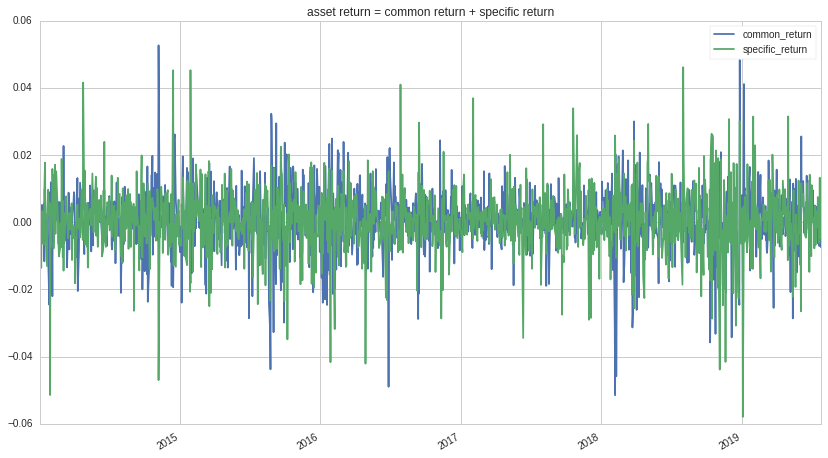

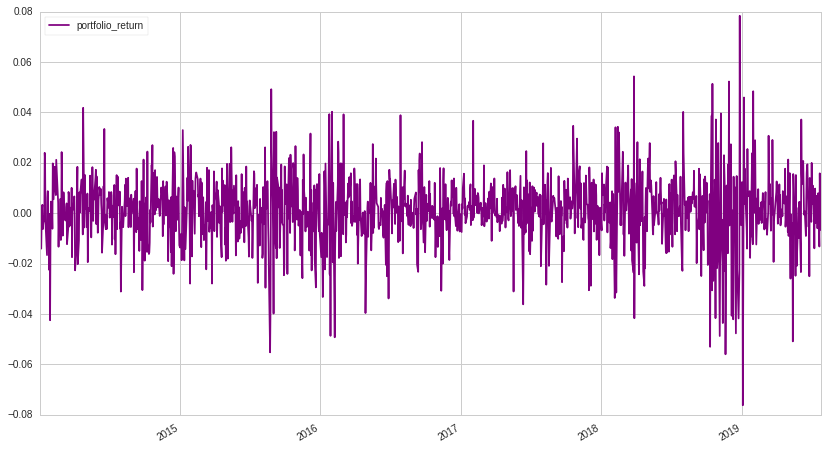

In [74]:
return_components.plot(title = "asset return = common return + specific return")
pd.DataFrame(portfolio_return).plot(color='purple');